In [2]:
!pip install qiskit qiskit-ibmq-provider
!pip uninstall qiskit qiskit-terra -y
!pip install qiskit
!pip install qiskit-ibm-runtime
!pip install qiskit-algorithms
!pip install qiskit-optimization

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.1/164.1 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 2.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstal

Found existing installation: qiskit 1.2.2
Uninstalling qiskit-1.2.2:
  Successfully uninstalled qiskit-1.2.2
Found existing installation: qiskit-terra 0.46.3
Uninstalling qiskit-terra-0.46.3:
  Successfully uninstalled qiskit-terra-0.46.3
  Using cached qiskit-1.2.2-cp38-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
Using cached qiskit-1.2.2-cp38-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.7 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 33.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 343.3/343.3 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.6/308.6 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 643.4/643.4 kB 21.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml

In [3]:
import time
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

from qiskit import QuantumCircuit, transpile
from qiskit_ibm_runtime import QiskitRuntimeService, Session, Sampler
from qiskit.quantum_info import SparsePauliOp

from qiskit_algorithms.minimum_eigensolvers import QAOA
from qiskit.primitives import Sampler
from qiskit_algorithms.optimizers import COBYLA
from qiskit_algorithms.optimizers import SPSA
from qiskit_algorithms.minimum_eigensolvers import QAOA

from qiskit_optimization import QuadraticProgram
from qiskit_optimization.converters import QuadraticProgramToQubo
from qiskit_optimization.algorithms import MinimumEigenOptimizer

# import networkx as nx
# import time
# from qiskit_optimization import QuadraticProgram
# from qiskit_optimization.converters import QuadraticProgramToQubo
# from qiskit_algorithms.minimum_eigensolvers import QAOA
# from qiskit.primitives import Sampler
# from qiskit_algorithms.optimizers import SPSA
# from qiskit_optimization.algorithms import MinimumEigenOptimizer
# from concurrent.futures import ProcessPoolExecutor
# from statistics import mean


In [4]:
# connects to ibm quantum computers, due to lack of access, we only connected to simulator
def setup_qiskit_service(token):
    QiskitRuntimeService.save_account(
        token=token,
        overwrite=True,
        channel='ibm_quantum'
    )
    service = QiskitRuntimeService()
    return service

# for those with access, the following finds backend with least jobs in queue
def select_best_backend(service):
    backends = service.backends()
    best_backend = min(backends, key=lambda b: b.status().pending_jobs)
    return best_backend

token="ddc71b3263aa615967698df559855f556450bbfdbf1fda97f136d812aed187ee23c18b6da43ceeb926583e4f6eea7773bc3855dafe7ce01da37e87aa4c5e4bf9"
service = setup_qiskit_service(token)
best_backend = select_best_backend(service)

In [5]:
def create_vertex_set(seq):
    """
    Create the initial vertex set from the sequence, vertices are position of the character in the sequence and where it could be mapped to.
    Specifically, (i,j,s,e) refers to the production seq[i][j] -> seq[i+1][s:e]

    Args:
    seq (list of str): The input sequence.

    Returns:
    dict: A dictionary representing the initial vertex set.
    """
    vertex_set = dict()

    m = len(seq) - 1

    for i in range(m):
        lag = len(seq[i + 1]) - len(seq[i])
        for j in range(len(seq[i])):
            if j == 0 and j == len(seq[i]) - 1:
                start = 0
                end = len(seq[i + 1]) - 1
                vertex_set[(i, j, start, end)] = {}
            elif j == 0:
                start = 0
                for end in range(0, lag + 1):
                    vertex_set[(i, j, start, end)] = {}
            elif j == len(seq[i]) - 1:
                end = len(seq[i + 1]) - 1
                for start in range(j, end + 1):
                    vertex_set[(i, j, start, end)] = {}
            else:
                for start in range(j, lag + j + 1):
                    for end in range(start, lag + j + 1):
                        vertex_set[(i, j, start, end)] = {}
    return vertex_set

def connect_vertices(vertex_set, seq):
    """
    Connect vertices in the vertex set based on the relation described in the paper.

    Args:
    vertex_set (dict): The initial vertex set.
    seq (list of str): The input sequence.

    Returns:
    dict: The updated vertex set with connections.
    """

    for node_1 in list(vertex_set.keys()):
        i_1, j_1, start_1, end_1 = node_1
        for node_2 in list(vertex_set.keys()):
            i_2, j_2, start_2, end_2 = node_2
            if node_1 in vertex_set[node_2].keys() or node_1 == node_2:
                continue
            elif seq[i_1][j_1] == seq[i_2][j_2] and seq[i_1 + 1][start_1: end_1 + 1] != seq[i_2 + 1][start_2: end_2 + 1]:
                vertex_set[node_1][node_2] = 1
                vertex_set[node_2][node_1] = 1
            elif i_1 == i_2 and j_2 == j_1 + 1 and end_1 != start_2 - 1:
                vertex_set[node_1][node_2] = 1
                vertex_set[node_2][node_1] = 1


def char_graph(seq):
    """
    Generate a characteristic graph from a given sequence.

    This function creates the characteristic graph of the given sequence

    Args:
    seq (list of str): A list of strings representing the sequence to analyze.

    Returns:
    tuple: A tuple containing:
        - G (networkx.Graph): The characteristic graph.
        - vertex_set (dict): A dictionary representing the vertex set of the graph.

    The graph's nodes represent characters and their positions in the sequence and what they could be potentially mapped to
    """
    vertex_set = create_vertex_set(seq)
    connect_vertices(vertex_set, seq)
    G = nx.Graph(vertex_set)
    return G, vertex_set

def plot_vertex_graph(G):
    """
    Plot the vertex graph using NetworkX and Matplotlib.

    This function visualizes the characteristic graph generated from the sequence.

    Args:
    G (networkx.Graph): The graph to be plotted.

    Returns:
    None
    """

    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=10)
    plt.show()

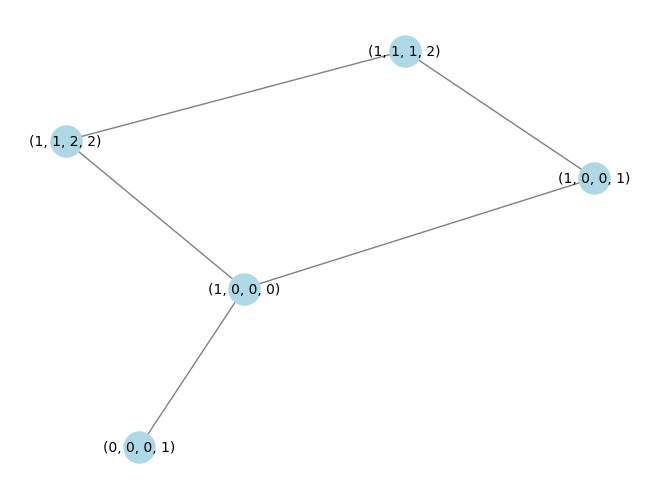

In [6]:
# finding characteristic graph for A->AB->ABB, which should a C4 connected to a single vertex of degree 1
seq = ['A', 'AB', 'ABB']
G,vertex_set = char_graph(seq)
plot_vertex_graph(G)


In [12]:

def create_qubo_matrix(vertex_set):
    """
    Create a QUBO (Quadratic Unconstrained Binary Optimization) matrix from a vertex set.

    This function converts the graph representation into a QUBO problem formulation,
    for quantum optimization algorithms.

    Args:
    vertex_set (dict): A dictionary representing the vertex set of the graph.

    Returns:
    tuple: A tuple containing:
        - qubo_matrix (dict): The QUBO matrix representation of the problem.
        - index_to_vert (dict): A mapping from indices of the vertices of the graph to vertices
    """
    vert_to_index = {v: i for i, v in enumerate(vertex_set)}
    index_to_vert = {i: v for v, i in vert_to_index.items()}
    n = len(vert_to_index)
    qubo_matrix = {(i,i):-1 for i in range(n)}

    for a in vertex_set:
        for b in vertex_set[a]:
            qubo_matrix[(vert_to_index[a], vert_to_index[b])] = n
            qubo_matrix[(vert_to_index[b], vert_to_index[a])] = n

    return qubo_matrix, index_to_vert


# qp = QuadraticProgram()
# for i in range(len(index_to_vert)):
#     qp.binary_var(name=f"x{i}")
# qp.minimize(quadratic=qubo_matrix)

# qubo = QuadraticProgramToQubo().convert(qp)

# qaoa = QAOA(optimizer=SPSA(maxiter=100), sampler=Sampler(), reps=reps)
# qaoa_optimizer = MinimumEigenOptimizer(qaoa)

# start_time = time.time()
# result = qaoa_optimizer.solve(qubo)
# end_time = time.time()

# independent_set = [index_to_vert[i] for i, x in enumerate(result.x) if x > 0.5]
# return result, independent_set, end_time - start_time

# def run_qaoa_optimization(qubo, backend, reps=3):
#     """
#     Run QAOA (Quantum Approximate Optimization Algorithm) optimization on a QUBO problem.

#     This function sets up and executes the QAOA algorithm on the provided quantum backend.

#     Args:
#     qubo (QuadraticProgram): The QUBO of the problem to be solved.
#     backend: The quantum backend to run the optimization on.
#     reps (int): The number of layers for the QAOA algorithm. Default is 3.

#     Returns:
#     tuple: A tuple containing:
#         - result: The optimization result.
#         - session_details: Details about the quantum computation session.
#     """
#     with Session(backend=backend, max_time="2h") as session:
#         qaoa = QAOA(optimizer=COBYLA(), sampler=Sampler(), reps=reps)
#         qaoa_optimizer = MinimumEigenOptimizer(qaoa)
#         result = qaoa_optimizer.solve(qubo)
#         session_details = session.details()
#     return result, session_details

def run_qaoa_optimization(qubo, backend, reps=3):
    """
    Run QAOA (Quantum Approximate Optimization Algorithm) optimization on a QUBO problem.

    This function sets up and executes the QAOA algorithm on the provided quantum backend.

    Args:
    qubo (QuadraticProgram): The QUBO of the problem to be solved.
    backend: The quantum backend to run the optimization on.
    reps (int): The number of layers for the QAOA algorithm. Default is 3.

    Returns:
    tuple: A tuple containing:
        - result: The optimization result.
        - session_details: Details about the quantum computation session.
    """
    with Session(backend=backend, max_time="2h") as session:
        qaoa = QAOA(optimizer=SPSA(maxiter=20), sampler=Sampler(), reps=reps)
        qaoa_optimizer = MinimumEigenOptimizer(qaoa)
        result = qaoa_optimizer.solve(qubo)
        session_details = session.details()
    return result, session_details
def process_results(result, index_to_vert, seq):
    """
    Process the optimization results to extract the production set.

    This function interprets the binary solution from the QAOA optimization
    and maps it back to the productions of the L-System.

    Args:
    result: The optimization result from QAOA.
    index_to_vert (dict): Mapping from indices of the vertices to the original vertices of the form (i,j,s,e).
    seq (list): The original input sequence.

    Returns:
    set: A set of tuples of the form (char,str) representing the production rules derived from the optimization result.
    """
    production_set = set()
    for i, a in enumerate(result.x):
        if a == 1:
            i, j, s, e = index_to_vert[i]
            production_set.add((seq[i][j], seq[i+1][s:e+1]))
    return production_set

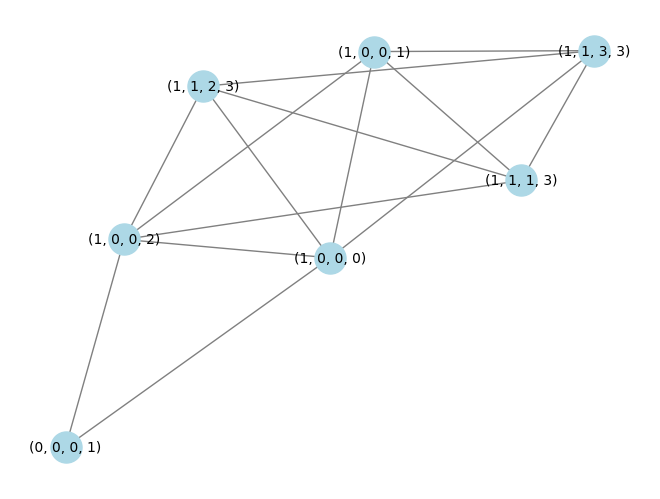

<ipython-input-12-1e4f588edbd4>:86: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  qaoa = QAOA(optimizer=SPSA(maxiter=20), sampler=Sampler(), reps=reps)


time taken for QAOA 5.738106528999879
Session details: {'id': 'cvxpkx7vtb30008dx37g', 'backend_name': 'ibm_sherbrooke', 'interactive_timeout': 2, 'max_time': 900, 'active_timeout': 900, 'state': 'open', 'accepting_jobs': True, 'last_job_started': None, 'last_job_completed': None, 'started_at': None, 'closed_at': None, 'activated_at': None, 'mode': 'dedicated', 'usage_time': 0}
Optimal value: -3.0
Solution: [1. 0. 1. 0. 0. 1. 0.]
Production set: {('B', 'BC'), ('A', 'AB')}


In [27]:
def main_qaoa(token, seq):
    service = setup_qiskit_service(token)
    backend = select_best_backend(service)

    G, vertex_set = char_graph(seq)
    plot_vertex_graph(G)

    qubo_matrix, index_to_vert = create_qubo_matrix(vertex_set)

    qp = QuadraticProgram()
    num_variables = max(max(i, j) for i, j in qubo_matrix.keys()) + 1
    for i in range(num_variables):
        qp.binary_var(name=f"x{i}")
    qp.minimize(quadratic=qubo_matrix)

    conv = QuadraticProgramToQubo()
    qubo = conv.convert(qp)
    reps=1
    start_time = time.perf_counter()

    result, session_details = run_qaoa_optimization(qubo, backend,reps)

    end_time = time.perf_counter()


    elapsed_time = end_time - start_time
    print("time taken for QAOA",elapsed_time)

    production_set = process_results(result, index_to_vert, seq)

    print("Session details:", session_details)
    print("Optimal value:", result.fval)
    print("Solution:", result.x)
    print("Production set:", production_set)

# Usage
token = "ddc71b3263aa615967698df559855f556450bbfdbf1fda97f136d812aed187ee23c18b6da43ceeb926583e4f6eea7773bc3855dafe7ce01da37e87aa4c5e4bf9"
seq = ['A', 'AB', 'ABBC']
main_qaoa(token, seq)

In the second part, we will implement the MIS based classical D0L solver.

The strategy is to again create the characteristic graph and then apply a classical MIS solver. Then the productions are extracted based on the result of the MIS assuming an MIS of certain size is found.

In [29]:
from itertools import chain, combinations

def is_independent_set(G, nodes):
    """Checks if the set of nodes is an independent set."""
    for u, v in combinations(nodes, 2):
        if G.has_edge(u, v):
            return False
    return True
def powerset(iterable):
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))
def has_independent_set_of_exact_size_K(G, K):
    """Check if the graph G has an independent set of exactly size K."""
    # Only check sets of size K
    for subset in combinations(G.nodes, K):
        if is_independent_set(G, subset) and len(subset) == K:
            return subset
    return None
def d0l_inference_solver(seq):
    # Original data structure and process
    K = sum(len(a) for a in seq[:-1])

    vertex_set = dict()

    m = len(seq) - 1

    for i in range(m):
        lag = len(seq[i + 1]) - len(seq[i])
        for j in range(len(seq[i])):
            if j == 0 and j == len(seq[i]) - 1:
                start = 0
                end = len(seq[i + 1]) - 1
                vertex_set[(i, j, start, end)] = {}
            elif j == 0:
                start = 0
                for end in range(0, lag + 1):
                    vertex_set[(i, j, start, end)] = {}
            elif j == len(seq[i]) - 1:
                end = len(seq[i + 1]) - 1
                for start in range(j, end + 1):
                    vertex_set[(i, j, start, end)] = {}
            else:
                for start in range(j, lag + j + 1):
                    for end in range(start, lag + j + 1):
                        vertex_set[(i, j, start, end)] = {}

    for node_1 in list(vertex_set.keys()):
        i_1, j_1, start_1, end_1 = node_1
        for node_2 in list(vertex_set.keys()):
            i_2, j_2, start_2, end_2 = node_2
            if node_1 in vertex_set[node_2].keys() or node_1 == node_2:
                continue
            elif seq[i_1][j_1] == seq[i_2][j_2] and seq[i_1 + 1][start_1: end_1 + 1] != seq[i_2 + 1][start_2: end_2 + 1]:
                vertex_set[node_1][node_2] = 1
                vertex_set[node_2][node_1] = 1
            elif i_1 == i_2 and j_2 == j_1 + 1 and end_1 != start_2 - 1:
                vertex_set[node_1][node_2] = 1
                vertex_set[node_2][node_1] = 1



    # Creating the NetworkX graph from vertex_set

    G = nx.Graph()
    for node_1, connections in vertex_set.items():
        G.add_node(node_1)
        for node_2 in connections:
            G.add_edge(node_1, node_2)
    start_time = time.perf_counter()


    end_time = time.perf_counter()

    # Check for an independent set of exact size K
    independent_set = has_independent_set_of_exact_size_K(G, K)

    end_time = time.perf_counter()
    if independent_set is None:
        end_time = time.perf_counter()
        elapsed_time = end_time - start_time
        print("Time taken for classical",elapsed_time)
        print("No solution to the D0L inference problem exists for the sequence:", seq)
        return False

    productions = {(seq[i][j], seq[i+1][start:end+1]) for (i, j, start, end) in independent_set}
    end_time = time.perf_counter()
    elapsed_time = end_time - start_time
    print("Time taken for classical",elapsed_time)
    return productions

# seq = ['AB', 'ABAB', 'ABABABAB']
seq = ['A', 'AB', 'ABB']
print(d0l_inference_solver(seq))


Time taken for classical 4.57529999948747e-05
{('B', 'B'), ('A', 'AB')}


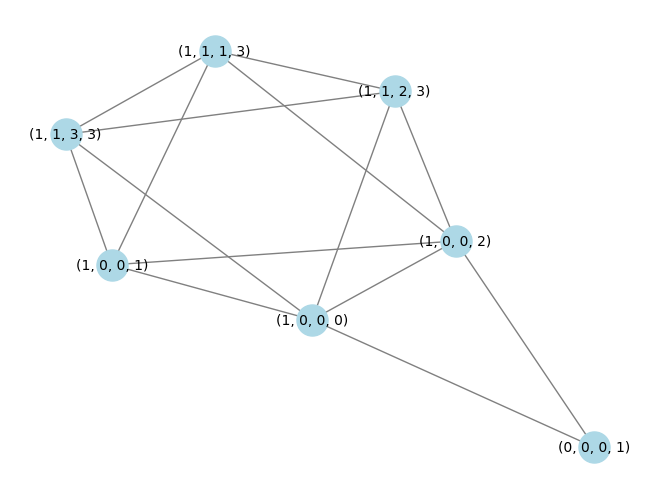

<ipython-input-12-1e4f588edbd4>:86: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  qaoa = QAOA(optimizer=SPSA(maxiter=20), sampler=Sampler(), reps=reps)


time taken for QAOA 19.324394536
Session details: {'id': 'cvxps859dd9g00808reg', 'backend_name': 'ibm_sherbrooke', 'interactive_timeout': 2, 'max_time': 900, 'active_timeout': 900, 'state': 'open', 'accepting_jobs': True, 'last_job_started': None, 'last_job_completed': None, 'started_at': None, 'closed_at': None, 'activated_at': None, 'mode': 'dedicated', 'usage_time': 0}
Optimal value: -3.0
Solution: [1. 0. 1. 0. 0. 1. 0.]
Production set: {('B', 'CD'), ('A', 'AB')}
Time taken for classical 3.875599986713496e-05


{('A', 'AB'), ('B', 'CD')}

In [32]:
token = "ddc71b3263aa615967698df559855f556450bbfdbf1fda97f136d812aed187ee23c18b6da43ceeb926583e4f6eea7773bc3855dafe7ce01da37e87aa4c5e4bf9"
seq = ['A', 'AB', 'ABCD']
main_qaoa(token, seq)
d0l_inference_solver(seq)